In [ ]:
# ls /dev/tty.*

In [ ]:
# %pip install matplotlib
# %pip install ipywidgets
# %pip install pyfirmata
# %pip install firebase-admin

In [ ]:
# import numpy as np
# import os
# import cv2
# from matplotlib import pyplot as plt
# import pickle
# import time
# import ipywidgets as widgets
# from IPython.display import display
# import sys
# from telemetrix import telemetrix

# DIGITAL_B = 11 # the board LED
# DIGITAL_G = 12
# DIGITAL_R = 7
# SERVO_PIN = 5
# BUTTON_PIN = 10
# # BUZZER = 13

# WAIT_TIME = 2 # sleep time to keep forever loop open

# # callback data indices
# CB_PIN_MODE = 0
# CB_PIN = 1
# CB_VALUE = 2
# CB_TIME = 3
# flag = True

# def the_callback(data):
#     global flag
#     value = data[CB_VALUE]
#     if value == 0:
#         print('System Reset')
#         board.digital_write(DIGITAL_B, 1)
#         board.digital_write(DIGITAL_R, 0)
#         flag = False
#     time.sleep(WAIT_TIME)

# board = telemetrix.Telemetrix('/dev/tty.usbmodem1101', arduino_wait=6)
# board.digital_write(DIGITAL_B, 1)

# # taking a picture with your webcam
# # board.digital_write(BUZZER, 0)

# # first we create a camera object
# camera = cv2.VideoCapture(0)

# # now we take 2 pictures since the first pic tends to be too dark,
# # as the code runs too fast for the exposure to be enough
# for i in range(3):
#     success, img_captured = camera.read()
#     time.sleep(0.3) # waiting time for the webcam to get more light

# cv2.imwrite('capturedPicture.png', img_captured) # saving the second pic we took
# del camera # closes the access to the camera by closing the camera object

# # Enter the paths for your image and cascade files here

# imagePath = 'capturedPicture.png'
# labelsPath = 'labels.pickle'

# # Create the haar cascade (XML file that contains the data to detect faces)
# faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') # Face classifier

# # create the recognizer
# recognizer = cv2.face.LBPHFaceRecognizer_create()
# # import the training data for the recognizer
# recognizer.read("trainer.yml")

# # import the lables created by the facesTrain program
# label = {}
# with open("labels.pickle", "rb") as pickleFile:
#     original_labels = pickle.load(pickleFile)
#     # invert the order:
#     labels = {v:k for k, v in original_labels.items()}

# # read the image
# image = cv2.imread(imagePath)
# image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.title("Original Image")
# plt.imshow(image_RGB) # open the image as RGB
# plt.xticks([]), plt.yticks([])
# plt.show()

# # transform the image to grayscale
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# plt.title("Gray Image")
# plt.imshow(gray, cmap='gray') # open the image as greyscale
# plt.xticks([]), plt.yticks([])
# plt.show()

# # detect faces in the image
# faces = faceCascade.detectMultiScale(
#     gray,
#     scaleFactor=1.21,
#     minNeighbors=4,
#     minSize=(20,20),
#     flags = cv2.CASCADE_SCALE_IMAGE
# )
# print(faces)

# # print "Found {0} faces!".format(len(faces))
# print('Faces found: ', len(faces))

# # Draw a rectangle around the faces
# for (x, y, w, h) in faces:
#     cv2.rectangle(image_RGB, (x, y), (x+w, y+h), (0, 255, 0), 5)
#     roi_gray = gray[y:y+h, x:x+w]
#     id_now, confidence = recognizer.predict(roi_gray)
#     print("confidence = ", confidence)
#     print("Face Recognized")
#     print("Access Granted")
# plt.title("Faces Found")
# plt.imshow(image_RGB) # open the image as RGB
# plt.xticks([]), plt.yticks([])
# plt.show()

# if confidence >= 70 and len(faces) > 0:
#     board.digital_write(DIGITAL_B, 0)
#     board.digital_write(DIGITAL_G, 1)
#     board.set_pin_mode_servo(SERVO_PIN, 100, 3000)
#     time.sleep(0.2)
#     board.servo_write(SERVO_PIN, 180)
#     time.sleep(1)
#     board.servo_write(SERVO_PIN, 0)
#     print("Opening the secret exit")
# else:
#     # board.digital_write(DIGITAL_B, 0)
#     # board.digital_write(DIGITAL_R, 1)
#     board.set_pin_mode_digital_input_pullup(BUTTON_PIN, callback = the_callback)
#     print("Access Denied")
#     print("Security Breach")
#     while (flag):
#         # board.digital_write(BUZZER, 1)
#         board.digital_write(DIGITAL_R, 1)
#         time.sleep(0.5)
#         # board.digital_write(BUZZER, 0)
#         board.digital_write(DIGITAL_R, 0)
#         time.sleep(0.5)

# board.shutdown()


In [ ]:
# import numpy as np
# import os
# import cv2
# from matplotlib import pyplot as plt
# import pickle
# import time
# from pyfirmata import Arduino, util
# from datetime import datetime

# import firebase_admin
# from firebase_admin import credentials, db

# # Initialize Firebase Admin SDK
# cred = credentials.Certificate("cs131-final-project-49b00-firebase-adminsdk-fbsvc-f0f99ac33c.json")
# firebase_admin.initialize_app(cred, {
#     'databaseURL': 'https://cs131-final-project-49b00-default-rtdb.firebaseio.com/'
# })


# DIGITAL_B = 11  # Blue LED
# DIGITAL_G = 12  # Green LED
# DIGITAL_R = 7   # Red LED
# SERVO_PIN = 5
# BUTTON_PIN = 10
# WAIT_TIME = 2

# flag = True

# # === Setup Arduino ===
# board = Arduino('/dev/tty.usbmodem1101')  # Replace with your port

# # Start iterator for reading button input
# it = util.Iterator(board)
# it.start()
# time.sleep(1)

# # Setup pins
# led_b = board.get_pin(f'd:{DIGITAL_B}:o')
# led_g = board.get_pin(f'd:{DIGITAL_G}:o')
# led_r = board.get_pin(f'd:{DIGITAL_R}:o')
# servo = board.get_pin(f'd:{SERVO_PIN}:s')
# button = board.get_pin(f'd:{BUTTON_PIN}:i')
# button.enable_reporting()

# # Initial LED state
# led_b.write(1)
# led_g.write(0)
# led_r.write(0)


# # === Take Picture with Webcam ===
# camera = cv2.VideoCapture(0)
# for i in range(3):
#     success, img_captured = camera.read()
#     time.sleep(0.3)
# cv2.imwrite('capturedPicture.png', img_captured)
# camera.release()

# # === Load Models and Labels ===
# faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# recognizer = cv2.face.LBPHFaceRecognizer_create()
# recognizer.read("trainer.yml")

# with open("labels.pickle", "rb") as pickleFile:
#     original_labels = pickle.load(pickleFile)
#     labels = {v: k for k, v in original_labels.items()}

# # === Process Captured Image ===
# imagePath = 'capturedPicture.png'
# image = cv2.imread(imagePath)
# image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.title("Original Image")
# plt.imshow(image_RGB)
# plt.xticks([]), plt.yticks([])
# plt.show()

# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# plt.title("Gray Image")
# plt.imshow(gray, cmap='gray')
# plt.xticks([]), plt.yticks([])
# plt.show()

# faces = faceCascade.detectMultiScale(
#     gray,
#     scaleFactor=1.21,
#     minNeighbors=4,
#     minSize=(20, 20),
#     flags=cv2.CASCADE_SCALE_IMAGE
# )
# print(f'Faces found: {len(faces)}')

# # === Face Recognition ===
# confidence = 0
# for (x, y, w, h) in faces:
#     cv2.rectangle(image_RGB, (x, y), (x+w, y+h), (0, 255, 0), 5)
#     roi_gray = gray[y:y+h, x:x+w]
#     id_now, confidence = recognizer.predict(roi_gray)
#     print("confidence =", confidence)
#     # print("Face Recognized")
#     # print("Access Granted")

# plt.title("Faces Found")
# plt.imshow(image_RGB)
# plt.xticks([]), plt.yticks([])
# plt.show()

# # === Access Control Logic ===
# if confidence >= 10 and len(faces) > 0:
#     print("Access Granted")
#     timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
#     print("Access Time:", timestamp)   
#     print("Opening the secret exit")
#     ref = db.reference("access_logs")
#     ref.push({
#         "status": "granted",
#         "timestamp": timestamp,
#         "person": labels.get(id_now, "Unknown")
#     })
#     led_b.write(0)
#     while flag:
#         led_g.write(1)
#         servo.write(90)
#         time.sleep(0.5)
#         led_g.write(0)
#         time.sleep(0.5)
#         btn_value = button.read()
#         if btn_value is True:  # button pressed
#             print("System Reset")
#             led_b.write(1)
#             led_g.write(0)
#             led_r.write(0)
#             servo.write(0)
#             time.sleep(1)
#             flag = False
#             break
# else:
#     print("Access Denied")
#     timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
#     print("Denied Time:", timestamp) 
#     print("Security Breach")
#     ref = db.reference("access_logs")
#     ref.push({
#         "status": "denied",
#         "timestamp": timestamp
#     })
#     led_b.write(0)
#     while flag:
#         led_r.write(1)
#         time.sleep(0.5)
#         led_r.write(0)
#         time.sleep(0.5)
#         btn_value = button.read()
#         if btn_value is True:  # button pressed
#             print("System Reset")
#             led_b.write(1)
#             led_g.write(0)
#             led_r.write(0)
#             servo.write(0)
#             time.sleep(1)
#             flag = False
#             break

# board.exit()


In [1]:
import numpy as np
import cv2
import pickle
import time
from datetime import datetime
from pyfirmata import Arduino, util
from matplotlib import pyplot as plt  # <-- Added for image display

import firebase_admin
from firebase_admin import credentials, db

# === Firebase Setup ===
cred = credentials.Certificate("cs131-final-project-49b00-firebase-adminsdk-fbsvc-f0f99ac33c.json")
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://cs131-final-project-49b00-default-rtdb.firebaseio.com/'
})

# === Arduino Pin Config ===
DIGITAL_B = 11  # Blue LED
DIGITAL_G = 12  # Green LED
DIGITAL_R = 7   # Red LED
SERVO_PIN = 5
BUTTON_PIN = 10
SERVO_OPEN = 90
SERVO_CLOSED = 30

# === Setup Arduino ===
board = Arduino('/dev/tty.usbmodem1101')
it = util.Iterator(board)
it.start()
time.sleep(1)

led_b = board.get_pin(f'd:{DIGITAL_B}:o')
led_g = board.get_pin(f'd:{DIGITAL_G}:o')
led_r = board.get_pin(f'd:{DIGITAL_R}:o')
servo = board.get_pin(f'd:{SERVO_PIN}:s')
button = board.get_pin(f'd:{BUTTON_PIN}:i')
button.enable_reporting()

# === Set default state ===
def reset_system_state():
    led_b.write(1)
    led_g.write(0)
    led_r.write(0)
    servo.write(SERVO_CLOSED)
    time.sleep(1)

reset_system_state()

# === Load Face Recognizer and Labels ===
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read("trainer.yml")

with open("labels.pickle", "rb") as f:
    original_labels = pickle.load(f)
    labels = {v: k for k, v in original_labels.items()}

# === Recognition Logic ===
def recognize_face():
    camera = cv2.VideoCapture(0)
    for i in range(3):
        ret, img = camera.read()
        time.sleep(0.3)
    camera.release()

    if not ret:
        print("❌ Failed to capture image.")
        return

    cv2.imwrite('capturedPicture.png', img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    image_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    faces = faceCascade.detectMultiScale(
        gray, scaleFactor=1.21, minNeighbors=4, minSize=(20, 20), flags=cv2.CASCADE_SCALE_IMAGE
    )

    print(f"Faces found: {len(faces)}")
    confidence = 0
    id_now = None

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        id_now, confidence = recognizer.predict(roi_gray)
        print("Confidence:", confidence)

        # Draw rectangle and confidence label on image_RGB
        cv2.rectangle(image_RGB, (x, y), (x + w, y + h), (0, 255, 0), 2)
        name = labels.get(id_now, "Unknown")
        text = f"{name} (Confidence: {round(confidence, 2)})"
        cv2.putText(image_RGB, text, (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)


    # Show final result with matplotlib
    plt.title("Faces Found")
    plt.imshow(image_RGB)
    plt.xticks([]), plt.yticks([])
    plt.show()
    cv2.imwrite("annotated_result.png", cv2.cvtColor(image_RGB, cv2.COLOR_RGB2BGR))
    print("🖼 Annotated image saved as annotated_result.png")


    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    ref = db.reference("access_logs")

    if confidence >= 30 and len(faces) > 0:
        print("✅ Access Granted")
        ref.push({
            "status": "granted",
            "timestamp": timestamp,
            "person": labels.get(id_now, "Unknown")
        })
        led_b.write(0)
        led_g.write(1)
        servo.write(SERVO_OPEN)
        print("🔓 Door opened... waiting 7 seconds.")
        time.sleep(7)
    else:
        print("⛔ Access Denied")
        ref.push({
            "status": "denied",
            "timestamp": timestamp
        })
        led_b.write(0)
        led_r.write(1)
        print("🚨 Access denied... waiting 7 seconds.")
        time.sleep(7)

    reset_system_state()
    
# === Main Loop ===
print("🔄 System Ready. Press the button to attempt access.")

try:
    while True:
        if button.read() is True:
            print("🔘 Button Pressed")
            while button.read() is True:
                time.sleep(0.1)  # Debounce
            recognize_face()
            print("🟢 Ready for next attempt...")
        time.sleep(0.1)
except KeyboardInterrupt:
    print("🛑 Exiting...")
    board.exit()


FileNotFoundError: [Errno 2] No such file or directory: 'cs131-final-project-49b00-firebase-adminsdk-fbsvc-f0f99ac33c.json'

🔄 System Ready. Press the button to attempt access.
🔘 Button Pressed


2025-05-27 19:41:40.670 python[42158:6545503] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


Faces found: 2
Confidence: 35.30373635861673
Confidence: 75.60121516614369


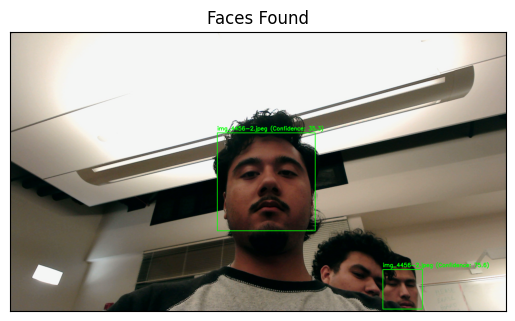

🖼 Annotated image saved as annotated_result.png
✅ Access Granted
🟢 Ready for next attempt...
🔘 Button Pressed
Faces found: 0


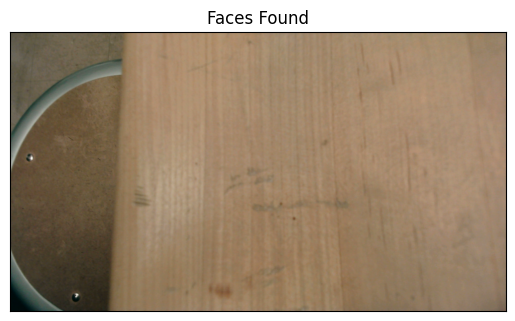

🖼 Annotated image saved as annotated_result.png
⛔ Access Denied
🟢 Ready for next attempt...
🔘 Button Pressed
Faces found: 2
Confidence: 123.74497974502856
Confidence: 97.86881485742317


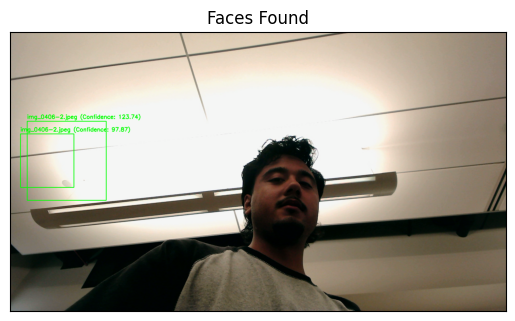

🖼 Annotated image saved as annotated_result.png
✅ Access Granted
🟢 Ready for next attempt...
🔘 Button Pressed
Faces found: 1
Confidence: 43.51041491221288


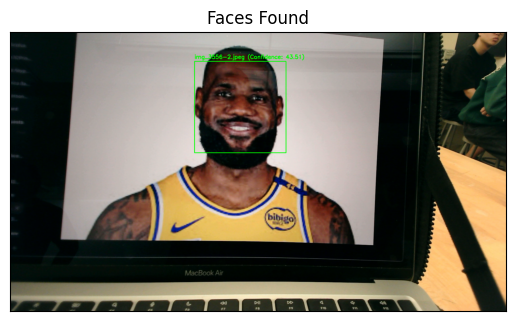

🖼 Annotated image saved as annotated_result.png
✅ Access Granted
🟢 Ready for next attempt...
🛑 Exiting...


SerialException: write failed: [Errno 6] Device not configured

In [2]:

import numpy as np
import cv2
import pickle
import time
from datetime import datetime
from pyfirmata import Arduino, util
from matplotlib import pyplot as plt

import firebase_admin
from firebase_admin import credentials, db

cred = credentials.Certificate("cs131-final-project-49b00-firebase-adminsdk-fbsvc-a736578831.json")
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://cs131-final-project-49b00-default-rtdb.firebaseio.com/'
})

DIGITAL_B = 11
DIGITAL_G = 12
DIGITAL_R = 7
SERVO_PIN = 5
BUTTON_PIN = 10
SERVO_OPEN = 90
SERVO_CLOSED = 30

board = Arduino('/dev/tty.usbmodem1101')
it = util.Iterator(board)
it.start()
time.sleep(1)

led_b = board.get_pin(f'd:{DIGITAL_B}:o')
led_g = board.get_pin(f'd:{DIGITAL_G}:o')
led_r = board.get_pin(f'd:{DIGITAL_R}:o')
servo = board.get_pin(f'd:{SERVO_PIN}:s')
button = board.get_pin(f'd:{BUTTON_PIN}:i')
button.enable_reporting()

def reset_system_state():
    led_b.write(1)
    led_g.write(0)
    led_r.write(0)
    servo.write(SERVO_CLOSED)
    time.sleep(1)

reset_system_state()

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read("trainer.yml")

with open("labels.pickle", "rb") as f:
    original_labels = pickle.load(f)
    labels = {v: k for k, v in original_labels.items()}

def recognize_face():
    camera = cv2.VideoCapture(0)
    for i in range(3):
        ret, img = camera.read()
        time.sleep(0.3)
    camera.release()

    if not ret:
        print("❌ Failed to capture image.")
        return

    cv2.imwrite('capturedPicture.png', img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    image_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    faces = faceCascade.detectMultiScale(
        gray, scaleFactor=1.21, minNeighbors=4, minSize=(20, 20), flags=cv2.CASCADE_SCALE_IMAGE
    )

    print(f"Faces found: {len(faces)}")
    confidence = 0
    id_now = None

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        id_now, confidence = recognizer.predict(roi_gray)
        print("Confidence:", confidence)

        cv2.rectangle(image_RGB, (x, y), (x + w, y + h), (0, 255, 0), 2)
        name = labels.get(id_now, "Unknown")
        text = f"{name} (Confidence: {round(confidence, 2)})"
        cv2.putText(image_RGB, text, (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    plt.title("Faces Found")
    plt.imshow(image_RGB)
    plt.xticks([]), plt.yticks([])
    plt.show()
    cv2.imwrite("annotated_result.png", cv2.cvtColor(image_RGB, cv2.COLOR_RGB2BGR))
    print("🖼 Annotated image saved as annotated_result.png")

    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    ref = db.reference("access_logs")

    if confidence >= 30 and len(faces) > 0:
        print("✅ Access Granted")
        ref.push({
            "status": "granted",
            "timestamp": timestamp,
            "person": labels.get(id_now, "Unknown"),
            "confidence": round(confidence, 2),
            "faces_found": len(faces)
        })
        led_b.write(0)
        led_g.write(1)
        servo.write(SERVO_OPEN)
        time.sleep(7)
    else:
        print("⛔ Access Denied")
        ref.push({
            "status": "denied",
            "timestamp": timestamp,
            "confidence": round(confidence, 2),
            "faces_found": len(faces)
        })
        led_b.write(0)
        led_r.write(1)
        time.sleep(7)

    reset_system_state()

print("🔄 System Ready. Press the button to attempt access.")

try:
    while True:
        if button.read() is True:
            print("🔘 Button Pressed")
            while button.read() is True:
                time.sleep(0.1)
            recognize_face()
            print("🟢 Ready for next attempt...")
        time.sleep(0.1)
except KeyboardInterrupt:
    print("🛑 Exiting...")
    board.exit()
